In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt 

In [2]:
import tensorflow as tf

In [ ]:
print(tf.config.list_physical_devices('GPU'))

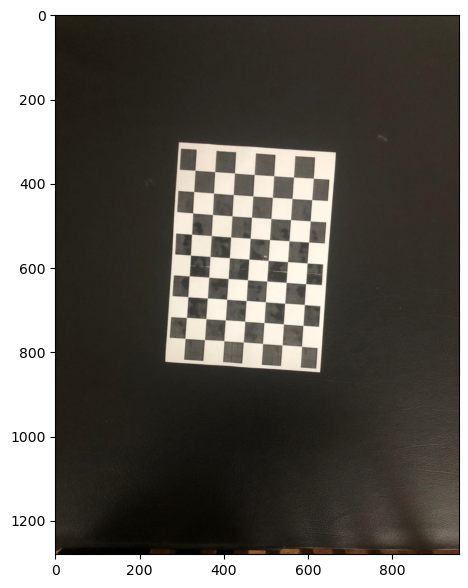

In [3]:
image=cv.imread('image.jfif')
image=cv.cvtColor(image,cv.COLOR_BGR2RGB)
%matplotlib inline 
plt.figure(figsize=(12,7))
plt.imshow(image)

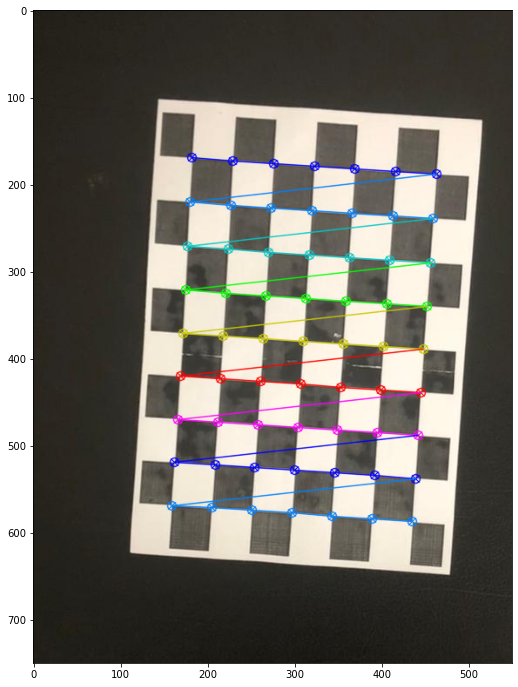

In [3]:
################ FIND CHESSBOARD CORNERS - OBJECT POINTS AND IMAGE POINTS #############################

chessboardSize = (7,9)
frameSize = (1280,958)



# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)


# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((chessboardSize[0] * chessboardSize[1], 3), np.float32)
objp[:,:2] = np.mgrid[0:chessboardSize[0],0:chessboardSize[1]].T.reshape(-1,2)

size_of_chessboard_squares_mm = 28
objp = objp * size_of_chessboard_squares_mm


# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.


gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
frame=image.copy()
# Find the chess board corners
ret, corners = cv.findChessboardCorners(gray, chessboardSize, flags=cv.CALIB_CB_ADAPTIVE_THRESH+cv.CALIB_CB_EXHAUSTIVE)

# If found, add object points, image points (after refining them)
if ret == True:

        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)

        # Draw and display the corners
        cv.drawChessboardCorners(frame, chessboardSize, corners2, ret)
        %matplotlib inline
        plt.figure(figsize=(30,12))
        plt.imshow(frame[200:950,150:700])

In [4]:
############## CALIBRATION #######################################################
ret, cameraMatrix, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, frameSize, None, None)

In [5]:
d=np.array(dist).reshape(5,1)
print(d[0][0])

24.926099308109197


In [6]:
k=cameraMatrix #interistic matrixa
p=[]
for i in k:
    for j in i:
        p.append(j)
    p.append(0.)
p=np.array(p)

In [7]:
############## Creating Calibratoin file #######################################################

with open("calib.txt","w") as f:
    for i in p:
        f.write(str(i))
        f.write(" ")
with open("dist.txt","w") as f:
    for j in d:
        f.write(str(j[0]))
        f.write(" ")

In [8]:
##############Trying to load calibration file we created#######################################################
def Load_claib(filepath):
    with open(filepath, 'r') as f:
            params = np.fromstring(f.readline(), dtype=np.float64, sep=' ')
            P = np.reshape(params, (3, 4)) #Projection Martrix
            K = P[0:3, 0:3] #interistic Matrix
    return P,K

In [9]:
def Load_dist(filepath):
    with open(filepath, 'r') as f:
            params = np.fromstring(f.readline(), dtype=np.float64, sep=' ')
            dist= np.reshape(params, (1, 5))#distortion matrix 
    return dist

In [10]:
P,K=Load_claib("calib.txt")
dist=Load_dist("dist.txt")
print("distortion Matrix: ",dist)
print("interistic Matrix: ",K)
print("Projection Matrix: ",P)

distortion Matrix:  [[ 2.49260993e+01 -1.13195975e+03 -2.82055202e-01  4.04779256e-01
  -2.96567072e+00]]
interistic Matrix:  [[1.03451862e+04 0.00000000e+00 6.23590850e+02]
 [0.00000000e+00 1.14173993e+04 4.82481386e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Projection Matrix:  [[1.03451862e+04 0.00000000e+00 6.23590850e+02 0.00000000e+00]
 [0.00000000e+00 1.14173993e+04 4.82481386e+02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]]
